In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
df=pd.read_csv('/content/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [ ]:
  df.shape


(2416, 7)

In [ ]:
df.corr

<bound method DataFrame.corr of             Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  
0     18766300  
1     17187100  
2      8218800  
3      5139800  
4      6866900  
...        ...  
2411  11788500  
2412  17801500  
2413  29005700  
2414  15719300  
2415  47065000  

[2416 rows x 7 columns]>

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  
0     18766300  
1     17187100  
2      8218800  
3      5139800  
4      6866900  
...        ...  
2411  11788500  
2412  17801500  
2413  29005700  
2414  15719300  
2415  47065000  

[2416 rows x 7 columns]>

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# prompt: how to check the data

df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
def check_df(dataframe, head=5):
  print("##################### Shape #####################")
  print(dataframe.shape)
  print("##################### Types #####################")
  print(dataframe.dtypes)
  print("##################### Head #####################")
  print(dataframe.head(head))
  print("##################### Tail #####################")
  print(dataframe.tail(head))
  print("##################### NA #####################")
  print(dataframe.isnull().sum())
  print("##################### Quantiles #####################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
  return None

In [ ]:
check_df(df)

##################### Shape #####################
(2416, 7)
##################### Types #####################
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
##################### Head #####################
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
##################### Tail #####################
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Preparing the data
**bold text**

In [ ]:
tesla_df=df[["Date","Close"]]

In [ ]:
tesla_df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [ ]:
print (tesla_df["Date"].min())
print (tesla_df["Date"].max())

2010-06-29 00:00:00
2020-02-03 00:00:00


In [ ]:
print("Average Price Of Share Opening Price :-",np.median(df['Open']))

Average Price Of Share Opening Price :- 213.03500350000002


In [ ]:
df['Open'].value_counts()

Open
30.000000     6
28.000000     6
28.500000     5
220.000000    5
360.000000    4
             ..
210.050003    1
205.809998    1
226.009995    1
230.300003    1
673.690002    1
Name: count, Length: 2132, dtype: int64

In [ ]:
print("Average Price Of Share Closeing Price :-",np.median(df['Close']))

Average Price Of Share Closeing Price :- 212.960007


In [ ]:
df['Close'].value_counts()

Close
27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.979996    1
237.789993    1
780.000000    1
Name: count, Length: 2225, dtype: int64

In [ ]:
df['High'].value_counts()

High
34.500000     7
28.000000     7
30.000000     7
27.000000     6
34.799999     5
             ..
225.490005    1
206.789993    1
209.880005    1
205.000000    1
786.140015    1
Name: count, Length: 2128, dtype: int64

In [ ]:
df['Low'].value_counts()

Low
27.299999     6
28.000000     6
203.000000    5
27.900000     4
28.250000     4
             ..
232.429993    1
236.059998    1
244.410004    1
249.449997    1
673.520020    1
Name: count, Length: 2136, dtype: int64

In [ ]:
print("Columns are in df", df.columns)

Columns are in df Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
tesla_df.index = tesla_df['Date']

In [ ]:
tesla_df

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001
...,...,...
2020-01-28,2020-01-28,566.900024
2020-01-29,2020-01-29,580.989990
2020-01-30,2020-01-30,640.809998


In [ ]:
tesla_df.index = tesla_df['Close']

In [ ]:
tesla_df

,Date,Close
Close,,
23.889999,2010-06-29,23.889999
23.830000,2010-06-30,23.830000
21.959999,2010-07-01,21.959999
19.200001,2010-07-02,19.200001
16.110001,2010-07-06,16.110001
...,...,...
566.900024,2020-01-28,566.900024
580.989990,2020-01-29,580.989990
640.809998,2020-01-30,640.809998


In [ ]:
tesla_df.drop('Date',axis=1,inplace=True)

In [ ]:
tesla_df

,Close
Close,
23.889999,23.889999
23.830000,23.830000
21.959999,21.959999
19.200001,19.200001
16.110001,16.110001
...,...
566.900024,566.900024
580.989990,580.989990
640.809998,640.809998


In [ ]:
result_df = tesla_df.copy()

In [ ]:
# plt.figure(figsize =(12,6))
# plt.plot(tesla_df["Close"],color="blue");
# # plt.plot(tesla_df['Close'],color = 'red')
# # plt.plot(tesla_df['High'],color = 'green')
# plt.ylabel('Stock Price')
# plt.title("Tesla Stock Price")
# plt.xlabel("Time")
# plt.show()

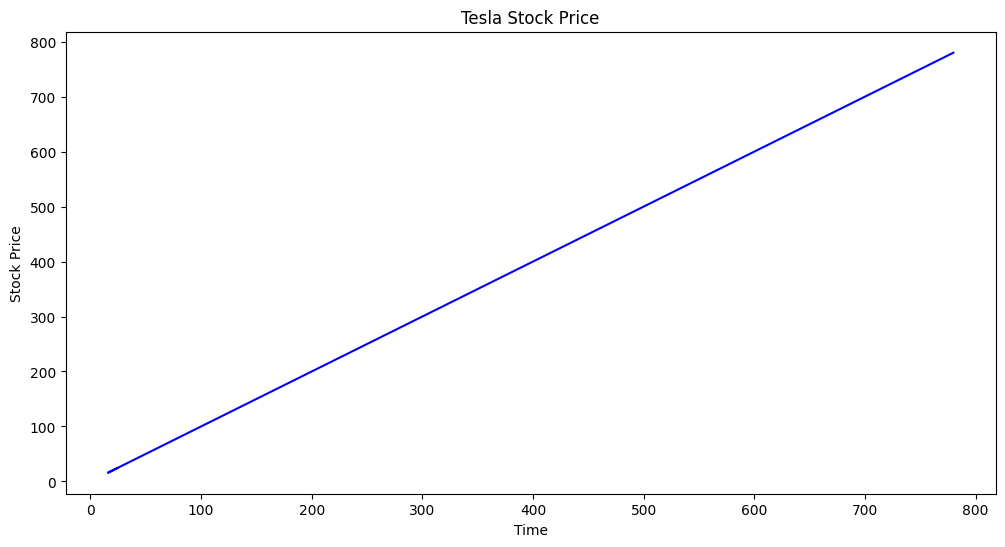

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(tesla_df["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

<Axes: ylabel='count'>

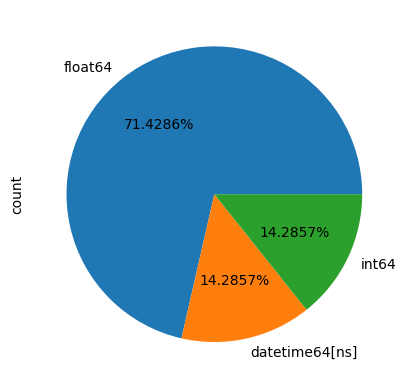

In [ ]:
df.dtypes.value_counts().plot.pie(autopct='%0.4f%%')

In [ ]:
import seaborn as sns

<Axes: >

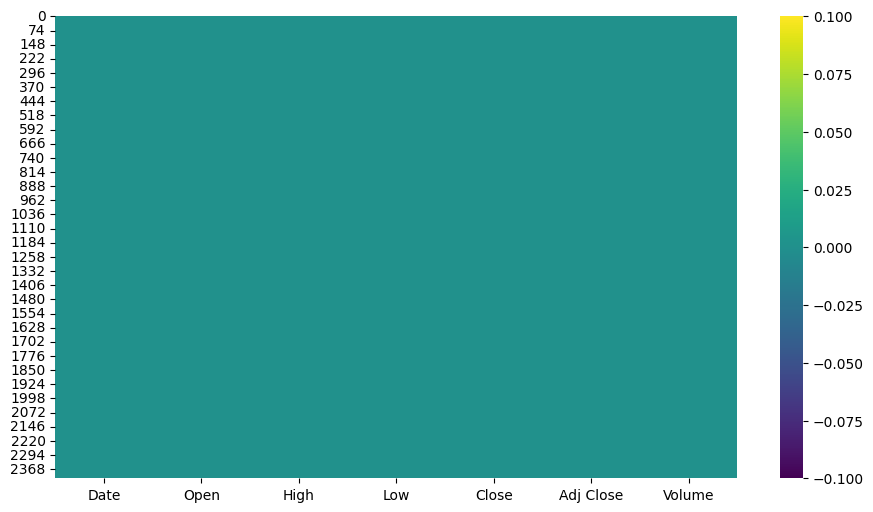

In [ ]:
plt.figure(figsize=(11,6))
sns.heatmap(df.isnull(), cmap ='viridis')

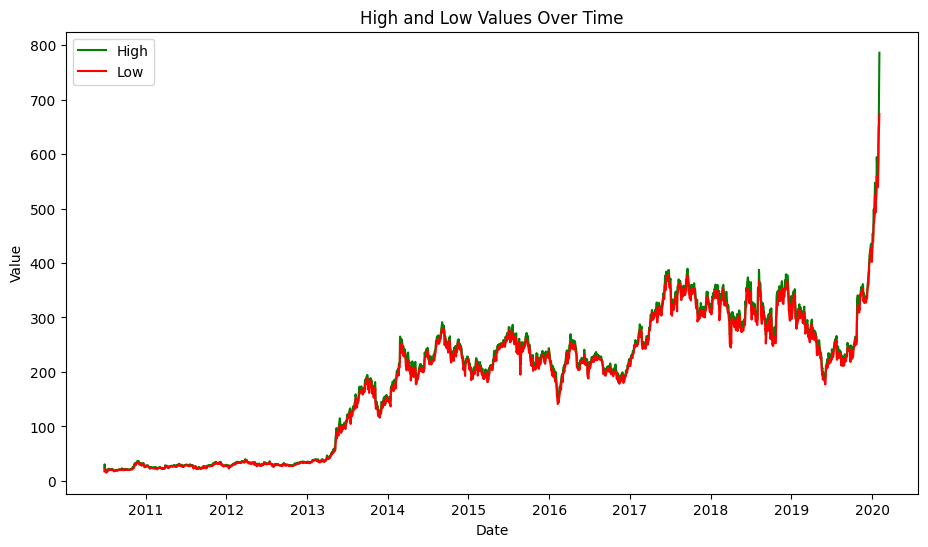

In [ ]:
plt.figure(figsize=(11, 6))
sns.lineplot(df, x="Date", y="High", color="Green", label="High")
sns.lineplot(df, x="Date", y="Low", color="Red", label="Low")
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('High and Low Values Over Time')
plt.legend()
plt.show()

In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 763.6 kB/s eta 0:00:00


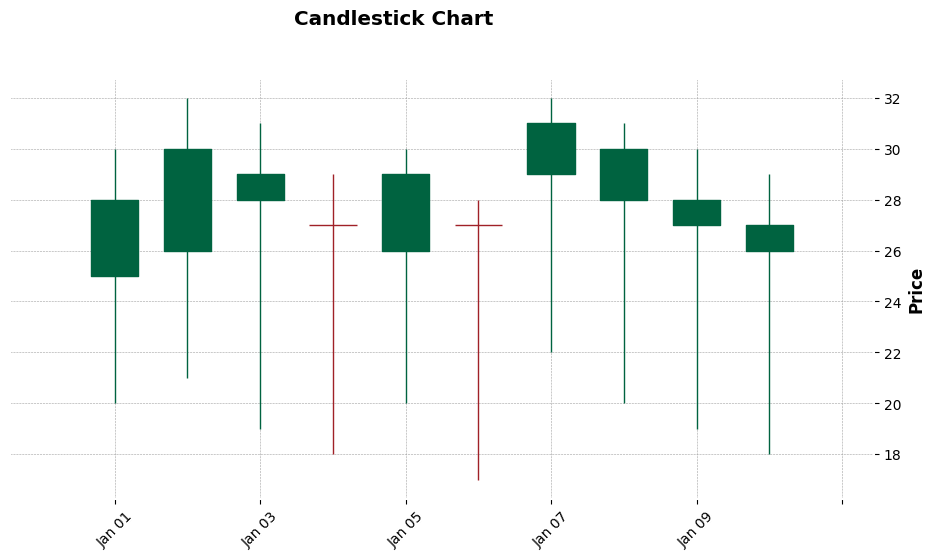

In [ ]:
import mplfinance as mpf

# Sample data
data_set = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=10, freq='D'),
    'Open': [25, 26, 28, 27, 26, 27, 29, 28, 27, 26],
    'High': [30, 32, 31, 29, 30, 28, 32, 31, 30, 29],
    'Low': [20, 21, 19, 18, 20, 17, 22, 20, 19, 18],
    'Close': [28, 30, 29, 27, 29, 27, 31, 30, 28, 27]
})

# Ensure the Date column is set as the index
data_set.set_index('Date', inplace=True)

# Plotting the candlestick chart
mpf.plot(data_set, type='candle', style='charles', title='Candlestick Chart', ylabel='Price', figsize=(12, 6))


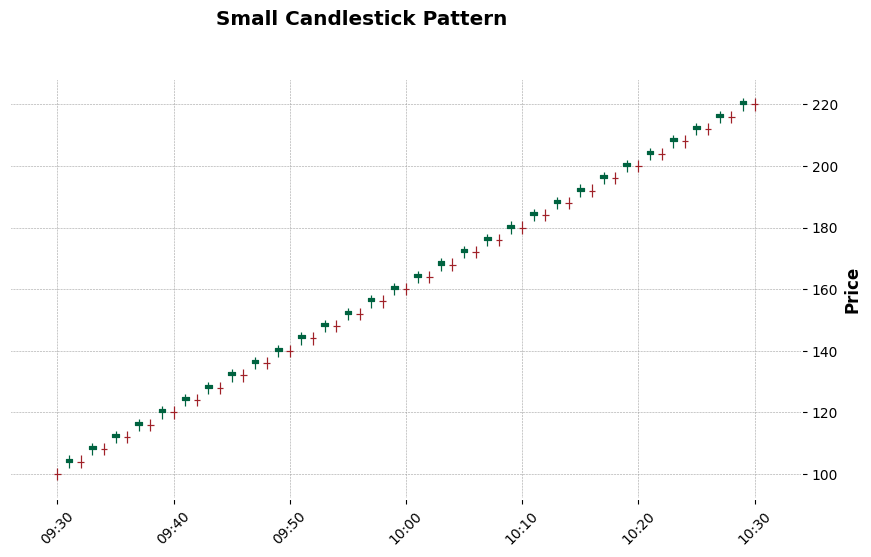

In [ ]:
import mplfinance as mpf

# Generate sample minute-by-minute data for a single day
date_rng = pd.date_range(start='2023-01-01 09:30', end='2023-01-01 16:00', freq='T')
data = {
    'Date': date_rng,
    'Open': pd.Series(100 + (5 * pd.Series(range(len(date_rng))).apply(lambda x: x % 2) + (pd.Series(range(len(date_rng))) % 2).apply(lambda x: -x)).cumsum()),
    'High': pd.Series(100 + (5 * pd.Series(range(len(date_rng))).apply(lambda x: x % 2) + (pd.Series(range(len(date_rng))) % 2).apply(lambda x: -x)).cumsum()) + 2,
    'Low': pd.Series(100 + (5 * pd.Series(range(len(date_rng))).apply(lambda x: x % 2) + (pd.Series(range(len(date_rng))) % 2).apply(lambda x: -x)).cumsum()) - 2,
    'Close': pd.Series(100 + (5 * pd.Series(range(len(date_rng))).apply(lambda x: x % 2) + (pd.Series(range(len(date_rng))) % 2).apply(lambda x: -x)).cumsum()) + pd.Series(range(len(date_rng))).apply(lambda x: x % 2)
}
data_set = pd.DataFrame(data)

# Ensure the Date column is set as the index
data_set.set_index('Date', inplace=True)

# Filter data for a smaller time range to see small candlestick patterns
small_time_range_data = data_set['2023-01-01 09:30':'2023-01-01 10:30']

# Plotting the candlestick chart for the small time range
mpf.plot(small_time_range_data, type='candle', style='charles', title='Small Candlestick Pattern', ylabel='Price', figsize=(11, 6))

[ 16.139999  16.4       17.389999 ... 632.419983 640.       673.690002] This is the sorted data of an open share price


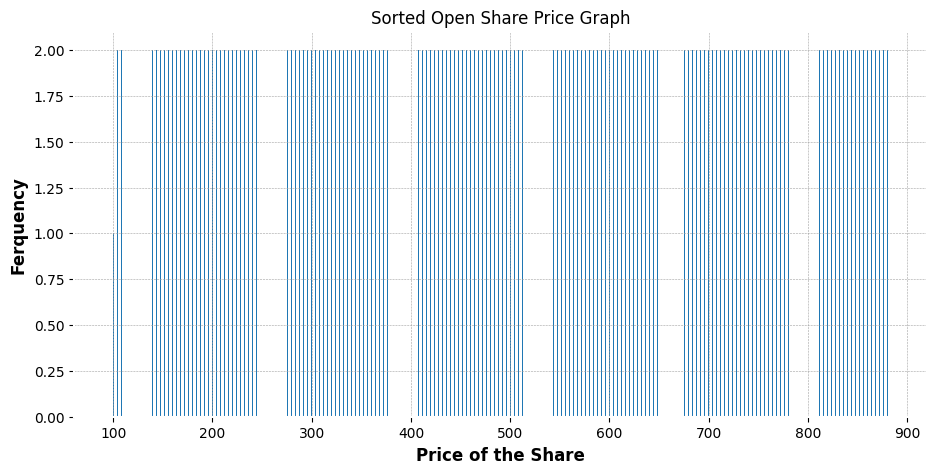

In [ ]:
print(np.sort(df['Open']), "This is the sorted data of an open share price")
plt.figure(figsize=(11,5))
plt.bar(list(np.sort(data_set['Open'].value_counts().keys())), list(np.sort(data_set['Open'].value_counts())))
plt.title("Sorted Open Share Price Graph")
plt.xlabel('Price of the Share')
plt.ylabel('Ferquency')
plt.show()

Text(0, 0.5, 'Frequency')

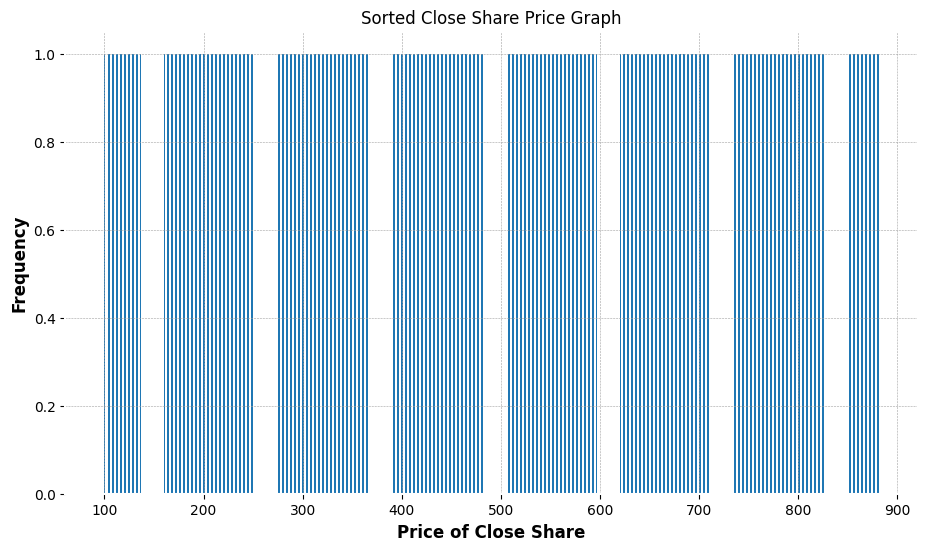

In [ ]:
plt.figure(figsize=(11,6))
plt.bar(list(data_set['Close'].value_counts().keys()), list((data_set['Close'].value_counts())))
plt.title("Sorted Close Share Price Graph")
plt.xlabel("Price of Close Share")
plt.ylabel("Frequency")

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(list(data_set['Volume'].value_counts().keys()))
plt.title("Share Volume Graph")
plt.xlabel("Volume of Share")
plt.ylabel("Frequency")

KeyError: 'Volume'

<Figure size 500x500 with 0 Axes>

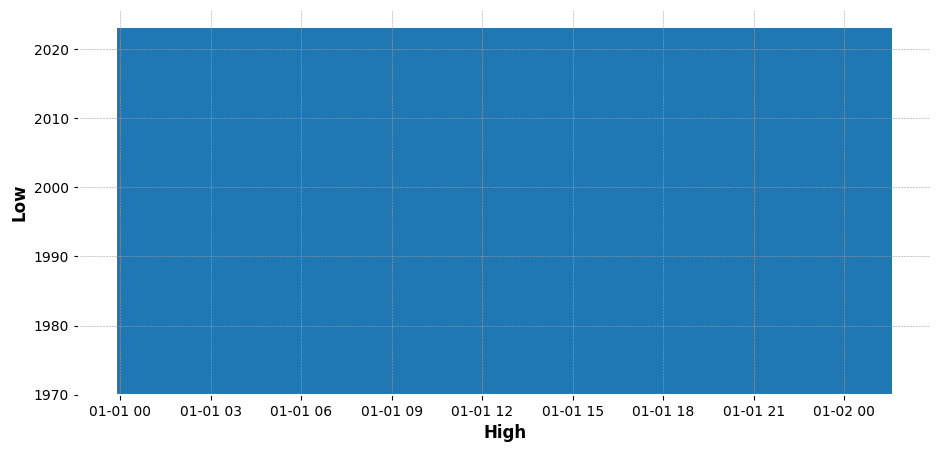

In [ ]:
plt.figure(figsize=(11,5))
plt.bar(list(data_set['High'].keys()), list(data_set['Low'].keys()))
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

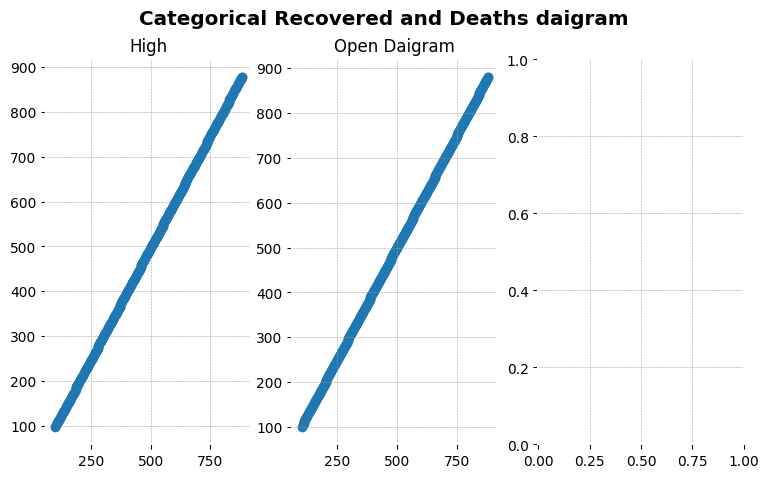

In [ ]:
plt.figure(figsize=(9, 5))
plt.subplot(131)
plt.plot(list(data_set['High']), list(data_set['Low']), 'o')
plt.title("High")
plt.subplot(132)
plt.scatter(list(data_set['Open']), list(data_set['Close']))
plt.title("Open Daigram")
plt.subplot(133)

plt.suptitle("Categorical Recovered and Deaths daigram")
plt.show()

In [ ]:
np.mean(df['Open'])

186.27114660016557

In [ ]:
np.median(df['Close'])

212.960007

In [ ]:
np.mean(df['High'])

189.5782242562086

In [ ]:
np.median(df['Low'])

208.8700025

In [ ]:
data_set.describe()

,Open,High,Low,Close
count,391.000000,391.000000,391.000000,391.000000
mean,490.997442,492.997442,488.997442,491.496164
std,226.034664,226.034664,226.034664,226.037436
min,100.000000,102.000000,98.000000,100.000000
25%,296.000000,298.000000,294.000000,296.500000
50%,492.000000,494.000000,490.000000,492.000000
75%,686.000000,688.000000,684.000000,686.500000
max,880.000000,882.000000,878.000000,881.000000


In [ ]:
print(data_set.isnull().value_counts(), "There is No null in Dataset")

Open   High   Low    Close
False  False  False  False    391
Name: count, dtype: int64 There is No null in Dataset


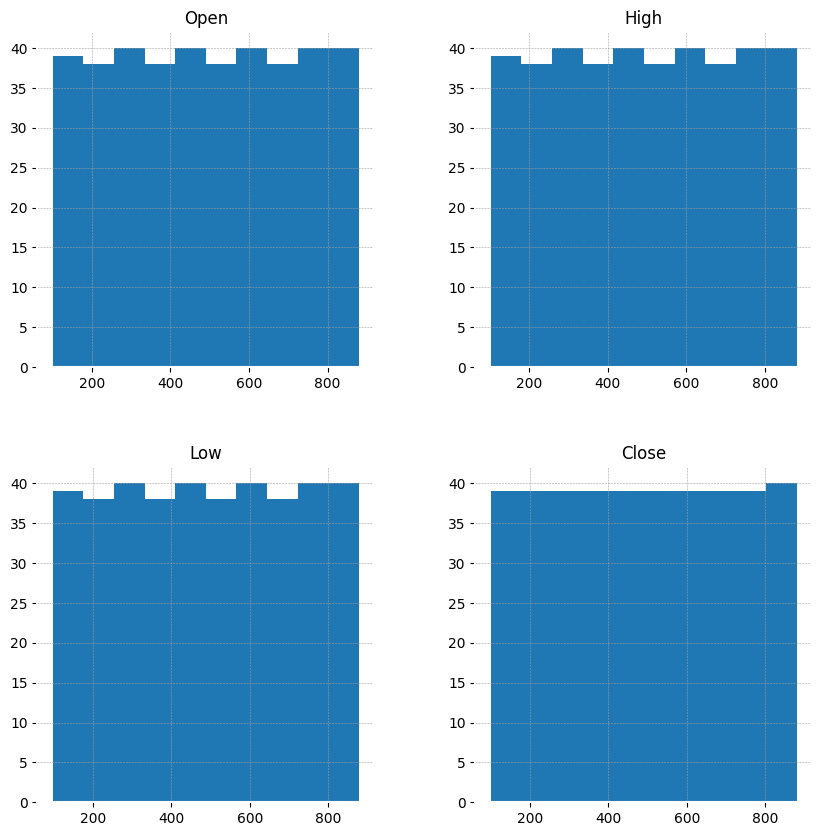

In [ ]:
data_set.hist(figsize=(10, 10))
plt.show()

In [ ]:
data_set.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

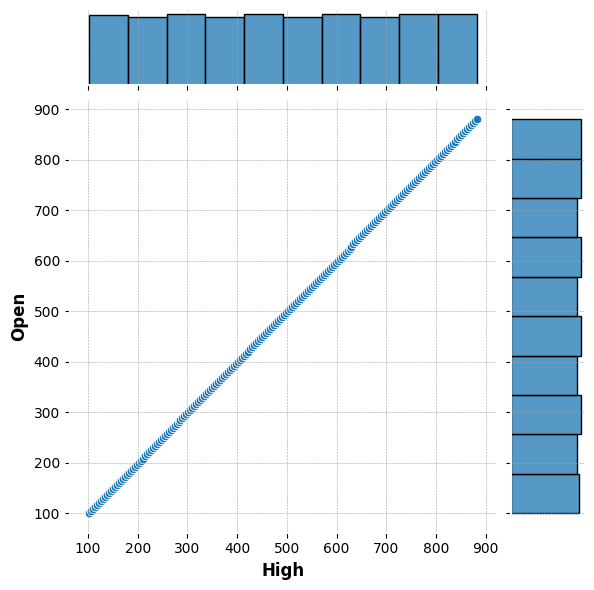

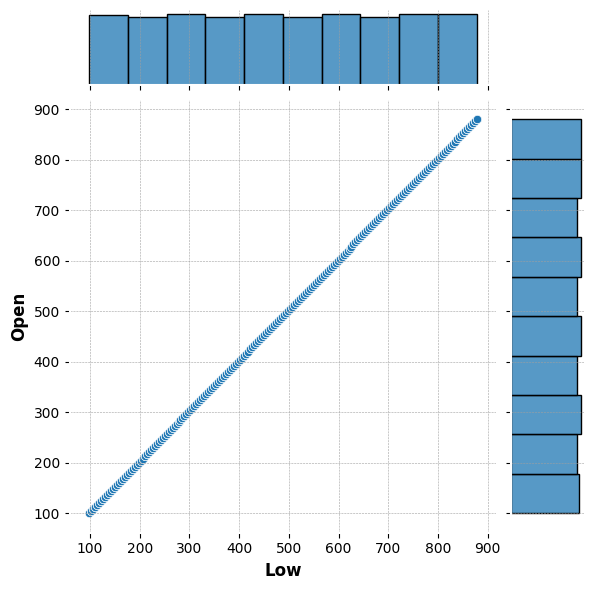

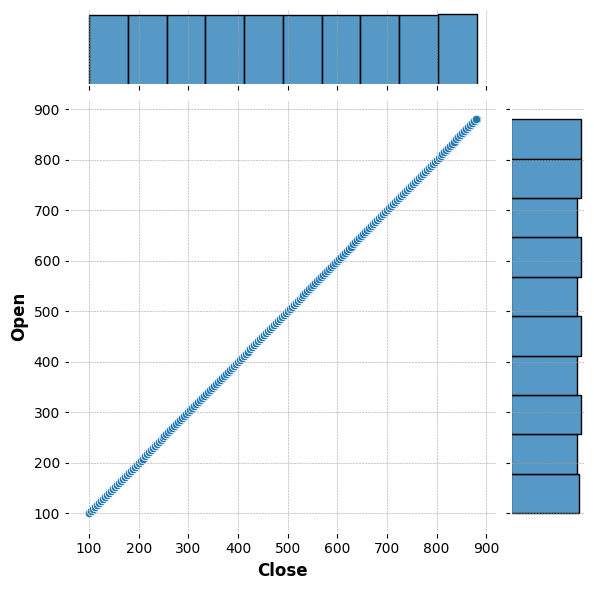

In [ ]:
sns.jointplot(data=data_set, x='High', y='Open')
sns.jointplot(data=data_set, x='Low', y='Open')
sns.jointplot(data=data_set, x='Close', y='Open')



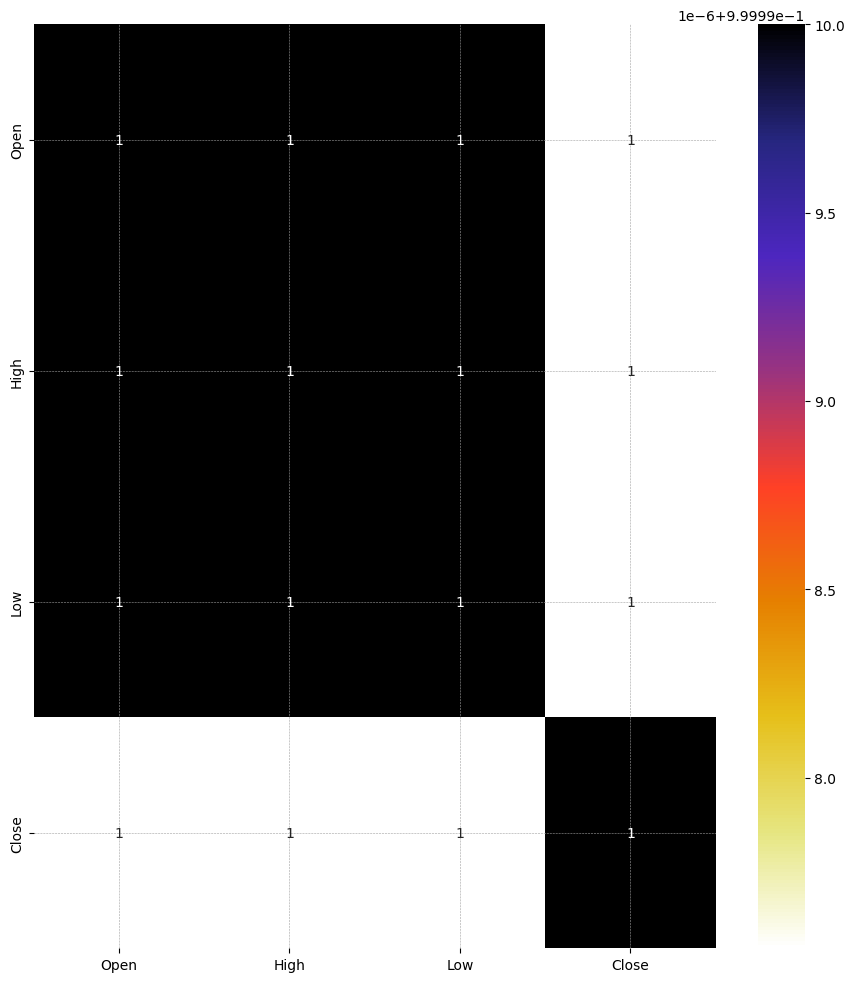

In [ ]:
plt.figure(figsize=(11,12))
sns.heatmap(data_set.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

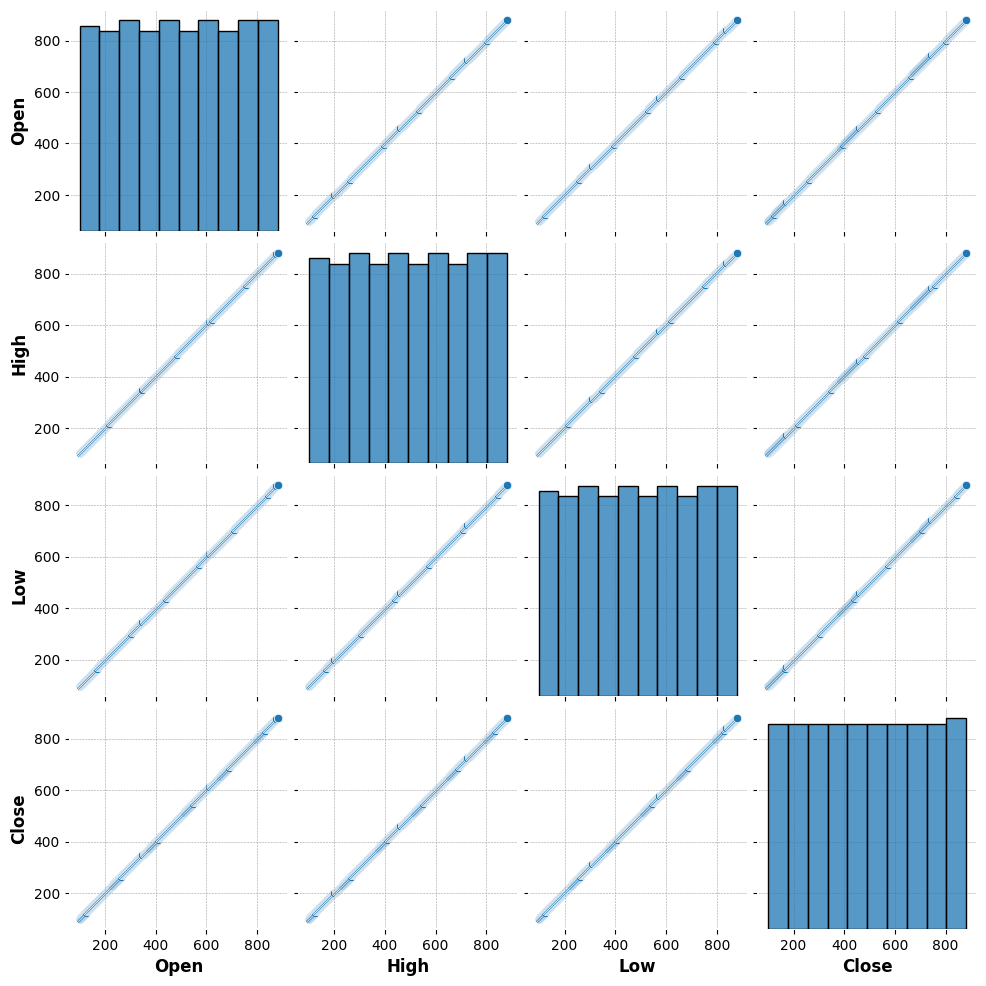

In [ ]:
sns.pairplot(data_set)

Half part of the EDA ends


In [ ]:
tesla_df=tesla_df.values

In [ ]:
tesla_df[0:5]

array([[23.889999],
       [23.83    ],
       [21.959999],
       [19.200001],
       [16.110001]])

In [ ]:
tesla_df = tesla_df.astype('float32')

NOW WE START DOING TRAIN AND TEST DISTINCTION AS A FUNCTION

In [ ]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
      break
      # Slice the sequence
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)

In [ ]:
def split_sequence(df,test_size ):
  pos=int(round(len(df)*(1-test_size)))
  train=df[:pos]
  test=df[pos:]
  return train,test,pos

In [ ]:
train,test,pos = split_sequence(tesla_df,0.20)

In [ ]:
print("Train data shape",train.shape)
print("Test data shape",test.shape)

Train data shape (1933, 1)
Test data shape (483, 1)


In [ ]:
scaler_train = MinMaxScaler(feature_range=(0,1))
scaler_test = MinMaxScaler(feature_range=(0,1))

In [ ]:
train = scaler_train.fit_transform(train)
test = scaler_test.fit_transform(test)

In [ ]:
train[0:5]

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [ ]:
test[0:5]

array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [ ]:
def create_features(data, lookback):
  X = []
  Y = []
  for i in range(lookback,len(data)):
        X.append(data[i-lookback:i,0])
        Y.append(data[i,0])
        return np.array(X),np.array(Y)

In [ ]:
lookback=20

In [ ]:
X_train,y_train= create_features(train,lookback)

In [ ]:
X_test,y_test=create_features(test,lookback)

In [ ]:
# print("X_train shape",x_train.shape)
# print("Y_train shape",y_tarin.shape)
# print("X_test shape",x_test.shape)
# print("Y_test shape",y_test.shape)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1, 20) (1,) (1, 20) (1,)


In [ ]:
X_train[0:5]

array([[0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
        0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
        0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
        0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286566]],
      dtype=float32)

In [ ]:
y_test[0:5]

array([0.14734703], dtype=float32)

NOW WE WILL LOOK FOR CLOSING PRICE

In [ ]:
X_train =np.reshape( X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))


In [ ]:
y_train= y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1, 1, 20) (1, 1) (1, 1, 20) (1, 1)


DATA MODELLING

In [ ]:
model=Sequential()
model.add(LSTM(units=50,
              activation="relu",
              input_shape=(X_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 14251 (55.67 KB)
Trainable params: 14251 (55.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
          ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss",mode="min",
                         save_best_only=True,save_weights_only=False,verbose=1)]

In [ ]:
history=model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=(X_test,y_test),
                    callbacks=callbacks,
                    shuffle=False)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 1.9037e-07
Epoch 1: val_loss improved from inf to 0.01987, saving model to mymodel.h5
1/1 [==============================] - 3s 3s/step - loss: 1.9037e-07 - val_loss: 0.0199
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 7.1364e-06
Epoch 2: val_loss did not improve from 0.01987
1/1 [==============================] - 0s 77ms/step - loss: 7.1364e-06 - val_loss: 0.0202
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 7.8807e-08
Epoch 3: val_loss did not improve from 0.01987
1/1 [==============================] - 0s 81ms/step - loss: 7.8807e-08 - val_loss: 0.0205
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 1.6554e-06
Epoch 4: val_loss did not improve from 0.01987
1/1 [==============================] - 0s 88ms/step - loss: 1.6554e-06 - val_loss: 0.0208
Epoch 4: early stopping


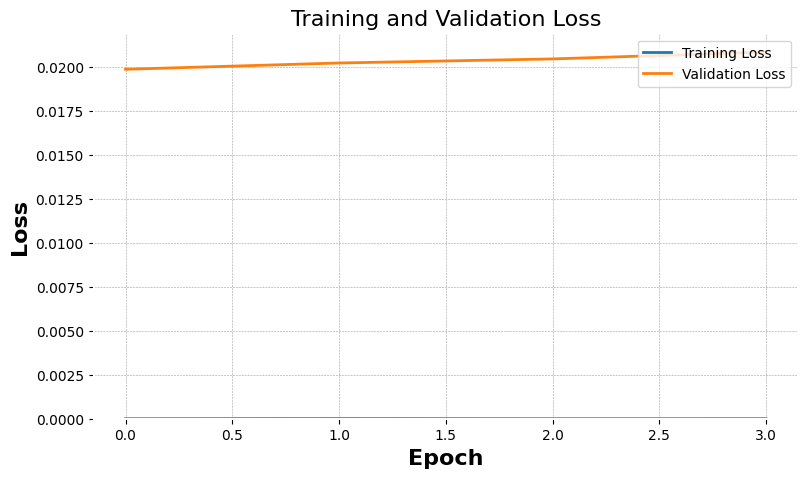

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation Loss",fontsize=16)
plt.show()

In [ ]:
loss = model.evaluate(X_test, y_test,batch_size=20)

1/1 [==============================] - 0s 50ms/step - loss: 0.0208


In [ ]:
print("\nTest loss:%.1f%%"%(100.0*loss))


Test loss:2.1%


In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 31ms/step


In [ ]:
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_test.inverse_transform(test_predict)

In [ ]:
y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_test.inverse_transform(y_test)

 FINDING THE RMSE VALUE TO TRAIN DATASET

In [ ]:
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
print("Train RMSE:%.2f"%train_rmse)
print("Test RMSE:%.2f"%test_rmse)

Train RMSE:0.20
Test RMSE:86.78
